In [1]:
import pandas as pd 
import datetime as dt
import numpy as np

In [2]:
# Borrar columnas 
diccionario_de_conversion = {
    'fecha_hora_creacion': 'datetime64[ns]',
    'fecha_hora_cierre': 'datetime64[ns]', 
    'codigo_cierre': 'category',
    'delegacion_inicio': 'category',
    'incidente_c4': 'category', 
    'clas_con_f_alarma': 'category', 
    'tipo_entrada': 'category',
    'delegacion_cierre':'category',
    'mes':'category'
}

In [3]:
df = pd.read_csv('data/incidentes-viales-c5-limpio.csv', sep='$', index_col=0)
df = df.astype(diccionario_de_conversion);

1. ¿En qué delegación hay más accidentes?
2. ¿Cómo se termina el proceso de seguimiento a los accidentes?
3. ¿Cómo reportan los accidentes?

### ¿En qué delegación hay más accidentes?

<AxesSubplot:ylabel='delegacion_inicio'>

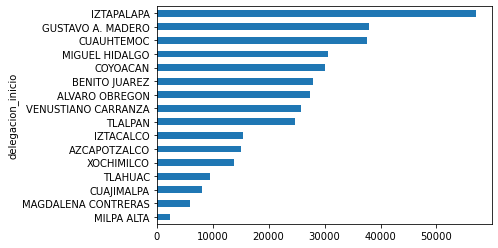

In [4]:
top_delegaciones = df.groupby('delegacion_inicio').size().sort_values(ascending=False).index.to_list()
top_5_delegaciones = top_delegaciones[:6]

df.groupby('delegacion_inicio').size().sort_values(ascending=True).plot(kind='barh')

### ¿Cómo reportan los accidentes?

<AxesSubplot:ylabel='tipo_entrada'>

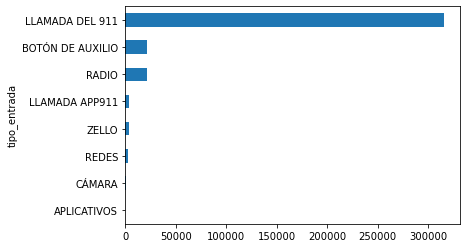

In [5]:
top_tipo_entrada = df.groupby('tipo_entrada').size().sort_values(ascending=False).index.to_list()
top_5_tipo_entrada = top_tipo_entrada[:5]
df.groupby('tipo_entrada').size().sort_values(ascending=True).plot(kind='barh')

### ¿Cómo reportan los accidentes por delegación?

In [6]:
via_reporte_por_delegacion = df.groupby(['tipo_entrada', 'delegacion_inicio']).size()

<AxesSubplot:xlabel='delegacion_inicio'>

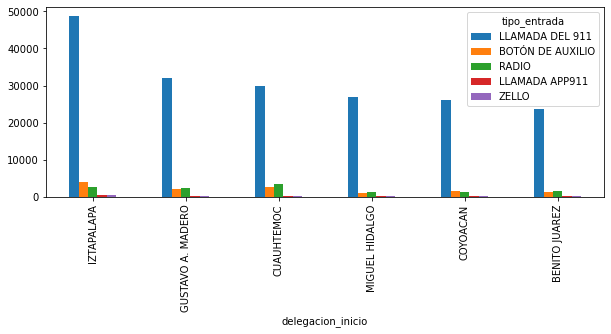

In [7]:
via_reporte_por_delegacion.loc[(top_5_tipo_entrada, top_5_delegaciones)].unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5))

### ¿Cómo se termina el proceso de seguimiento a los accidentes por delegacion de inicio y de cierre?

In [8]:
# Agregar columnas auxiliares delta de tiempo
df['delta_timedate'] = (df['fecha_hora_cierre'] - df['fecha_hora_creacion'])
df['delta_hours'] = (df['fecha_hora_cierre'] - df['fecha_hora_creacion']).astype('timedelta64[h]')

In [9]:
print(f"El tiempo más corto en cerrar un caso fue: {df['delta_timedate'].min()}")
print(f"El tiempo más largo en cerrar un caso fue: {df['delta_timedate'].min()}")
print(f"El tiempo promedio en cerrar un caso fue: {df['delta_timedate'].mean()}")

El tiempo más corto en cerrar un caso fue: -323 days +00:13:41
El tiempo más largo en cerrar un caso fue: -323 days +00:13:41
El tiempo promedio en cerrar un caso fue: 0 days 00:52:08.401849545


<AxesSubplot:ylabel='delegacion_inicio'>

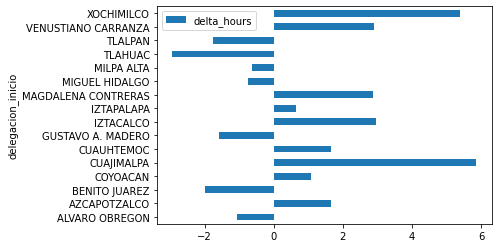

In [10]:
 # Tiempo promedio de respuesta por delegación en horas
 (df[df['delegacion_inicio'] == df['delegacion_cierre']])[['delegacion_inicio','delta_hours']].groupby('delegacion_inicio').mean().plot(kind='barh')

In [11]:
df.head(    
)

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_cierre,fecha_hora_creacion,delta_timedate,delta_hours
2,C5/170622/03715,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2017-06-22 16:48:07,2017-06-22 13:44:52,0 days 03:03:15,3.0
5,C5/170621/07339,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.38676,-99.03350,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 03:53:51,2017-06-21 23:29:01,0 days 04:24:50,4.0
8,C5/170622/01694,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.35017,-99.07324,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 10:47:19,2017-06-22 08:51:30,0 days 01:55:49,1.0
9,C5/170622/03779,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.37273,-99.27753,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2017-06-22 14:17:46,2017-06-22 13:49:44,0 days 00:28:02,0.0
12,C5/170622/04693,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45316,-99.19868,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2017-06-22 16:47:41,2017-06-22 15:48:39,0 days 00:59:02,0.0


In [13]:
# Indices de los casos que fueron resultos en la misma delegación de origen
indices_resuleto_en_delegacion = df[df['delegacion_inicio'] == df['delegacion_cierre']].index
# Crear una columna booleana si fué resulto en la misma delegación
df['resuelto_en_delegacion'] = df.index.map(lambda x: x in indices_resuleto_en_delegacion)

<AxesSubplot:xlabel='delegacion_inicio'>

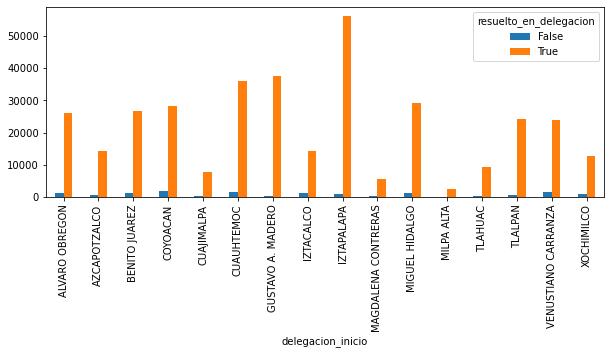

In [29]:
df.groupby(['resuelto_en_delegacion','delegacion_inicio']).size().unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5))